# Impact of Gerrymandering in the 2016 House of Representatives Election

In [1]:
import importlib 
import get_data
import get_dviz
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
%matplotlib inline

In [2]:
_ = importlib.reload(get_data)
_ = importlib.reload(get_dviz)
import numpy as np
import pandas as pd

## Get the Data
Source data: https://www.nytimes.com/elections/results/house <br>

In [3]:
election_results = get_data.get_nyt_election_results()
print(election_results.columns)
election_results.head()

Retrieving clean data ('data/candidate_results_clean.csv')
Done!
Index(['candidate_id', 'candidate_key', 'first_name', 'incumbent', 'last_name',
       'name_display', 'order', 'party_id', 'percent', 'percent_display',
       'seat', 'state_id', 'votes', 'winner', 'winner2', 'uncontested',
       'party_id2', 'state_seat_count', 'district_vote_count',
       'state_vote_count', 'district_candidate_count', 'wasted_winning_votes',
       'wasted_losing_votes', 'wasted_votes'],
      dtype='object')


,candidate_id,candidate_key,first_name,incumbent,last_name,name_display,order,party_id,percent,percent_display,...,winner2,uncontested,party_id2,state_seat_count,district_vote_count,state_vote_count,district_candidate_count,wasted_winning_votes,wasted_losing_votes,wasted_votes
0,young-513,youngd,Don,True,Young,Don Young,4,republican,50.5,50.5,...,1,0,republican,1,306970,306970,4,44068.0,0,44068.0
1,lindbeck-65461,lindbecks,Steve,False,Lindbeck,Steve Lindbeck,1,democrat,36.2,36.2,...,0,0,democrat,1,306970,306970,4,0.0,111019,111019.0
2,mcdermott-62643,mcdermottj,Jim,False,McDermott,Jim McDermott,2,libertarian,10.3,10.3,...,0,0,other,1,306970,306970,4,0.0,31770,31770.0
3,souphanavong-65821,souphanavongb,Bernie,False,Souphanavong,Bernie Souphanavong,3,no-party-affiliation,3.0,3.0,...,0,0,other,1,306970,306970,4,0.0,9093,9093.0
4,dummy,dummy,dummy,False,dummy,dummy,0,dummy,0.0,0.0,...,0,0,democrat,7,167227,1672272,1,0.0,0,0.0


## Question 1:  Where did the votes go?

**Republican electors casted about 1% more votes than democrats in the 2016 House of Representatives election.  Yet, they were able to elect about 24% more candidates than democrats.**  

In [4]:
# checking overall results
overall = get_data.get_overall_results(election_results)
overall.head()

,Party,Votes,Seats_Won,%_Votes,%_Seats_Won,Votes_to_Elect_Candidate,%_Total_Votes,sort_order
2,republican,62776697,241,48.938674,55.402299,2.604842e+05,0.203065,1
0,democrat,61991242,194,48.326359,44.597701,3.195425e+05,0.249105,2
1,other,3508313,0,2.734967,0.000000,inf,inf,3


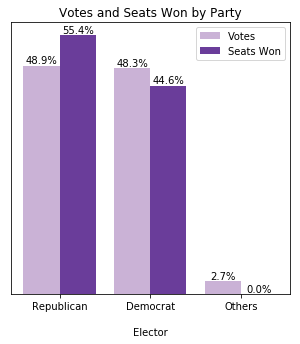

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
_ = get_dviz.plot_votes_and_seats_won_by_party(overall, fig, ax)

## Question 2:  Do republican electors have more power?

Power is defined by the Merriam-Webster as the ["ability to act or produce an effect"](https://www.merriam-webster.com/dictionary/power) .  **On average it took roughly 20% more Democrat electors to win a seat for their party than it took Republican electors to elect a Republican candidate.**  In that sense, Republican electors had more power in the 2016 House of Representative elections. 

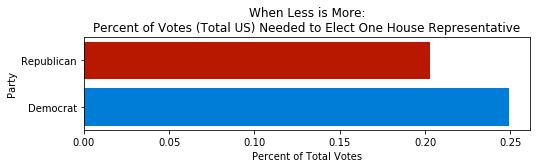

In [6]:
_ = get_dviz.plot_when_less_is_more_national(overall)

## Question 3:  How do state and national numbers compare?

Numbers at the state level reveal even more strikingly that Democrat electors needed more votes on average to elect their representatives to the House of Representatives than did Republican electors.  The horizontal lines on the graphs below show the national average votes needed to elect a candidate of each party.  

In [7]:
# checking results by state results
bystate = get_data.get_results_bystate(election_results)
#bystate.head()
bystate[bystate['State']=='MD']

,State,Party,Votes,Seats_Won,State_Seat_Count,State_Vote_Count,%_Votes,%_Winners,Votes_to_Elect_Candidate,%_of_Total,Missed_Seats,sort_order
59,MD,republican,962088,1,8,2703185,35.590905,12.5,9.620880e+05,0.750013,1.0,1
57,MD,democrat,1636200,7,8,2703185,60.528599,87.5,2.337429e+05,0.182218,0.0,2
58,MD,other,104897,0,8,2703185,3.880497,0.0,inf,inf,0.0,3


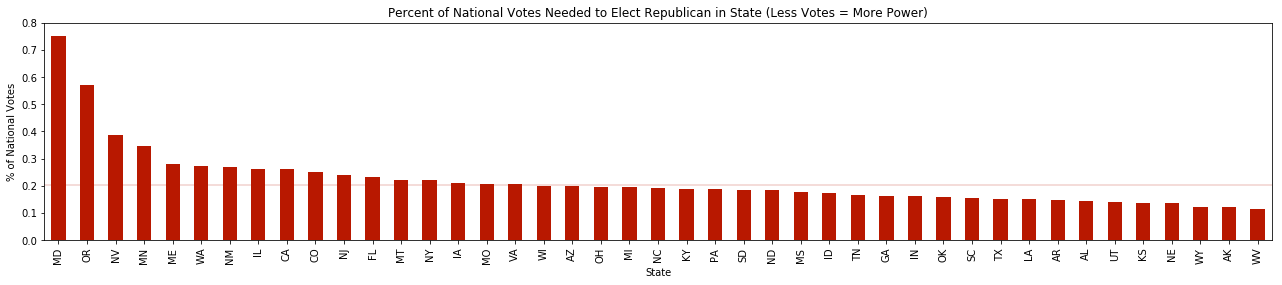

In [8]:
fig, ax = plt.subplots(1,1,figsize=(22,4))
_ = get_dviz.plot_when_less_is_more_by_state_party(overall, bystate, 'republican', fig, ax)

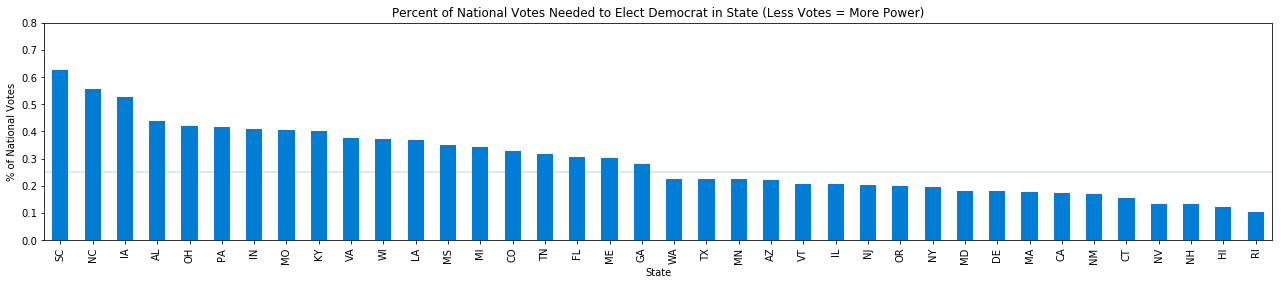

In [9]:
fig, ax = plt.subplots(1,1,figsize=(22,4))
_ = get_dviz.plot_when_less_is_more_by_state_party(overall, bystate, 'democrat', fig, ax)

## Question 4:  How do party numbers compare at the state level?

The problem we saw with Democratic electors needing to cast more votes to elect their candidates is exacerbated when we look at numbers at the state level.  Clearly democrats were disadvantaged in more states, and often in a more significant way. 

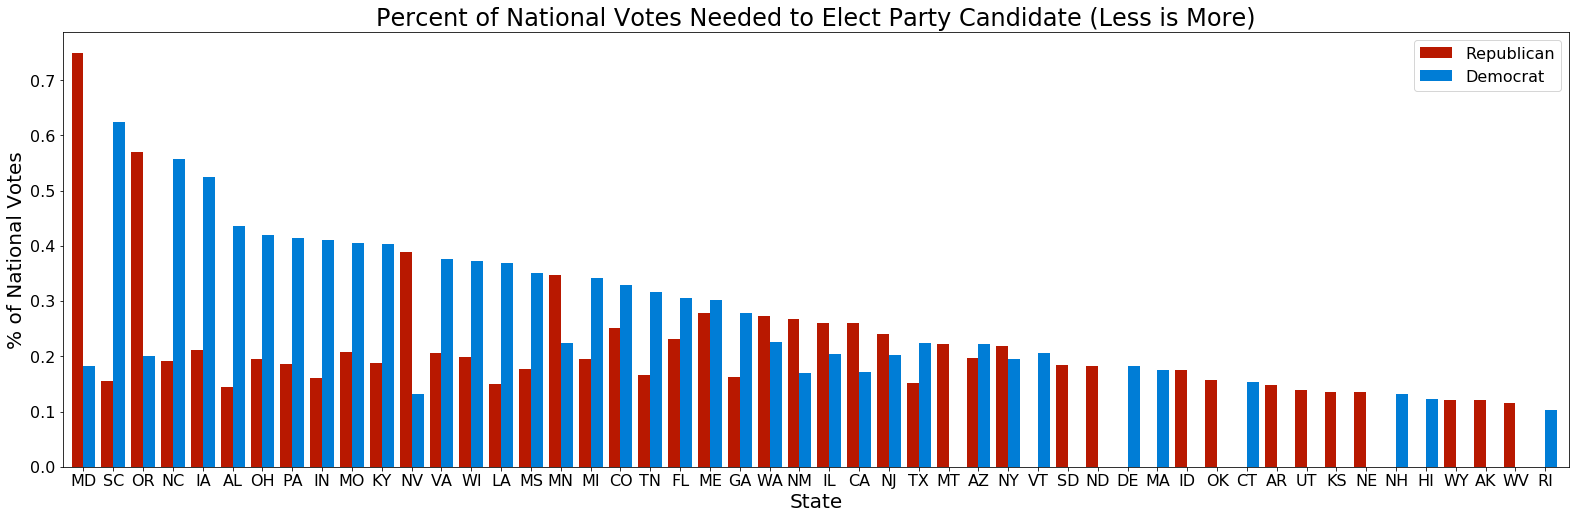

In [10]:
fig, ax = plt.subplots(1,1,figsize=(27,8))
_ = get_dviz.plot_when_less_is_more_by_state(bystate, fig, ax)

### Looking closer at 4 extreme examples where Democrat electors have more power:

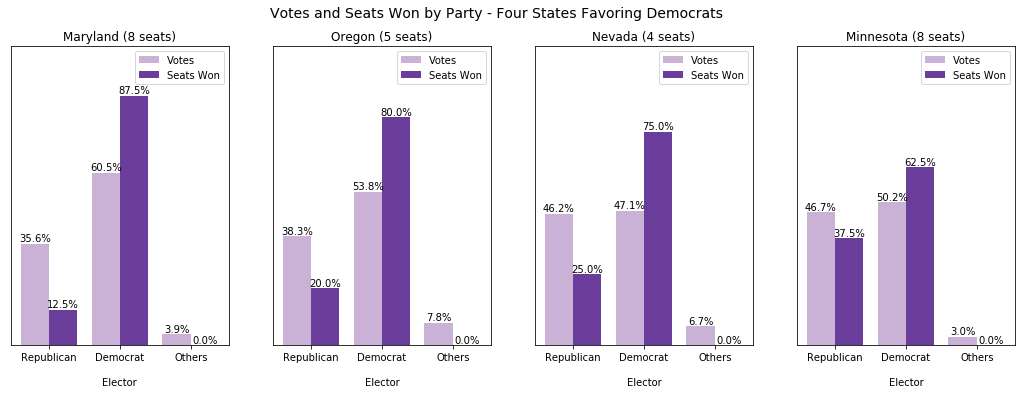

In [11]:
fig, ax = plt.subplots(1,4,figsize=(18,5.5))
figtitle = 'Votes and Seats Won by Party - Four States Favoring Democrats'
_ = get_dviz.plot_when_less_is_more_state_detail(election_results, fig, ax, figtitle, 'MD', 'OR', 'NV', "MN")

### Looking closer at 4 extreme examples where Republican electors have more power:

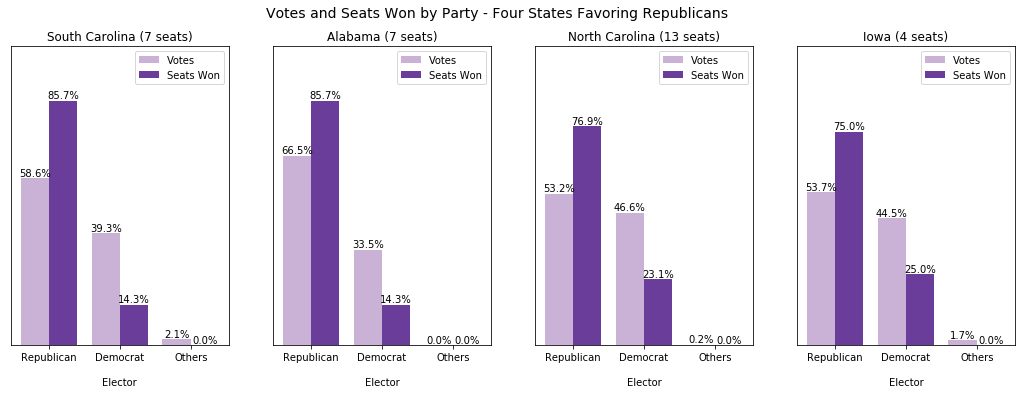

In [12]:
fig, ax = plt.subplots(1,4,figsize=(18,5.5))
figtitle = 'Votes and Seats Won by Party - Four States Favoring Republicans'
_ = get_dviz.plot_when_less_is_more_state_detail(election_results, fig, ax, figtitle, 'SC', 'AL', 'NC', "IA")

## Question 5:  How are votes cast on states where a party has extreme advantage?

By looking at the plot from Question 3 we can identify many states where one of the two parties appears to have substantially more power.  We can now analyze 3 states at a time.

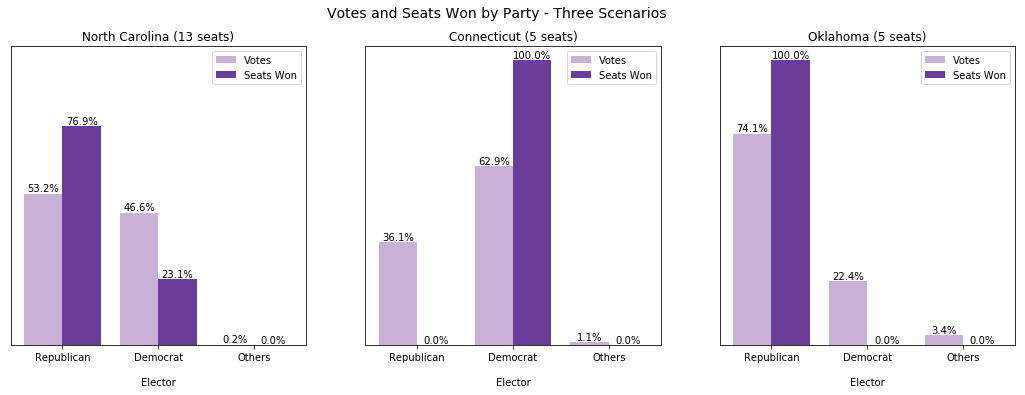

In [13]:
fig, ax = plt.subplots(1,3,figsize=(18,5.5))
figtitle = 'Votes and Seats Won by Party - Three Scenarios'
_ = get_dviz.plot_when_less_is_more_state_detail(election_results, fig, ax, figtitle, 'NC','CT', 'OK')

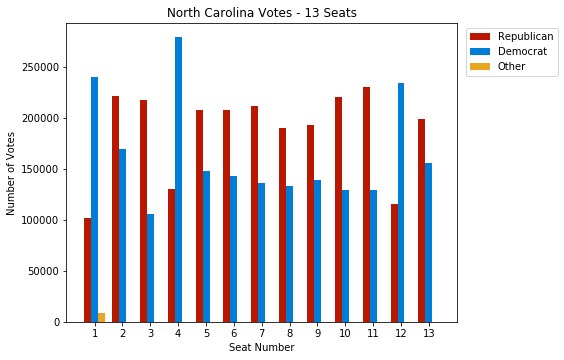

In [14]:
fig, ax = plt.subplots(figsize=(7,5.5))
_ = get_dviz.plot_state_votes_by_seat(election_results, 'NC', fig, ax)

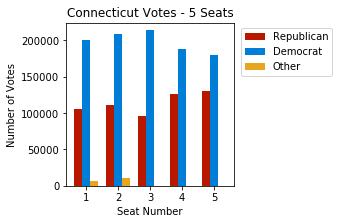

In [15]:
fig, ax = plt.subplots(figsize=(3,3))
_ = get_dviz.plot_state_votes_by_seat(election_results, 'CT', fig, ax)

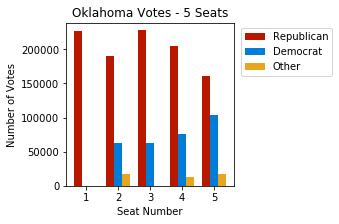

In [16]:
fig, ax = plt.subplots(figsize=(3,3))
_ = get_dviz.plot_state_votes_by_seat(election_results, 'OK', fig, ax)

## Question 6: Can the efficiency gap help identify gerrymandering?

The calculation of wasted votes is important for the efficiency gap. <br>
Here's how it's done...

** For districts with one uncontested candidate: <br> **
* all votes from winner beyond simple majority are considered wasted votes <br>

** For districts with two candidates: <br> **
* all votes from losing candidate are considered wasted votes <br>
* all votes from winner beyond simple majority are considered wasted votes <br>

** For districts with more than two candidates: <br> **
* all votes from losing candidates are considered wasted votes <br>
* all votes from winner beyond second most voted candidate plus 1, are considered wasted votes <br>

** We exclude states with a single district, since gerrymandering doesn't apply in those cases. **




In [17]:
wasted = get_data.get_wasted_votes(election_results)
wasted.head()

,state_id,seat,party_id2,candidate_key,district_candidate_count,votes,district_vote_count,state_vote_count,wasted_votes,state_id_seat
536,LA,1,republican,scalises,7,243645,326788,1470194,201804.0,LA / 1
1044,OR,3,democrat,blumenauere,3,274687,380819,1907397,196532.0,OR / 3
929,NY,13,democrat,espaillata,4,207194,233408,7149932,191104.0,NY / 13
1337,VA,10,democrat,bennettl,2,187712,398503,3808579,187712.0,VA / 10
1387,WI,4,democrat,mooreg,3,220181,285858,2824319,186686.0,WI / 4


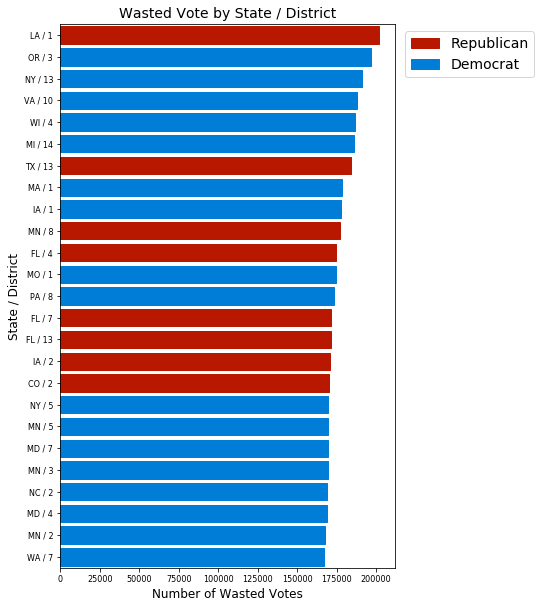

In [18]:
fig, ax = plt.subplots(figsize=(6, 10))
_ = get_dviz.plot_wasted_votes(wasted, fig, ax)

### And now we visualize the efficiency gap:

In [19]:
eg = get_data.get_efficiency_gap(election_results, bystate)
eg.head()

,state_id,democrat_wasted_votes,republican_wasted_votes,state_vote_count,efficiency_gap,favored_party,abs_efficiency_gap,missed_seats
51,NH,20448.0,316001.0,715844,-41.287348,democrat,41.287348,False
47,NC,1661671.0,702859.0,4598458,20.850729,republican,20.850729,True
17,HI,165047.0,85626.0,412873,19.236182,republican,19.236182,False
57,NV,192682.0,382381.0,1078497,-17.589201,democrat,17.589201,False
83,WI,1047215.0,552905.0,2824319,17.501918,republican,17.501918,True


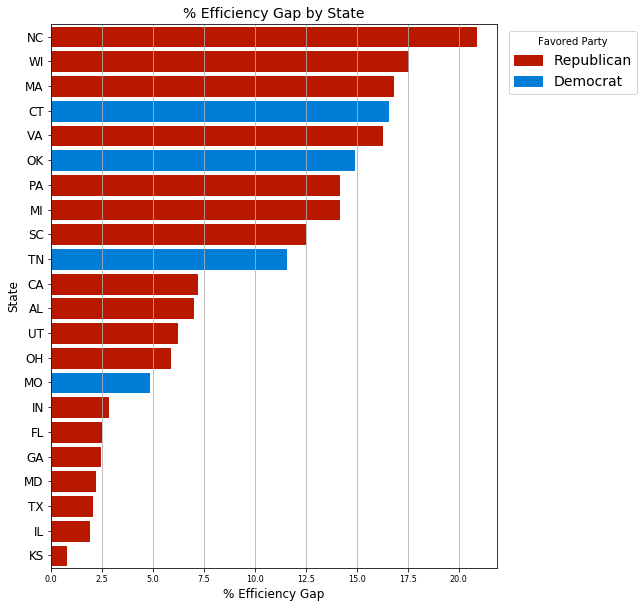

In [20]:
# states with missed seats
f, ax = plt.subplots(figsize=(8, 10))
_ = get_dviz.plot_efficiency_gap(eg, fig, ax)

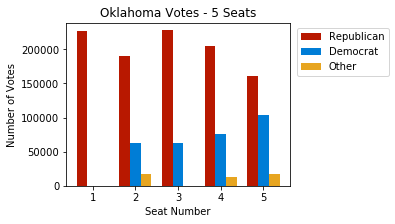

In [21]:
fig, ax = plt.subplots(figsize=(4,3))
_ = get_dviz.plot_state_votes_by_seat(election_results, 'OK', fig, ax)

In [22]:
# checking results by state results
bystate = get_data.get_results_bystate(election_results)
#bystate.head()
bystate[bystate['State']=='OK']

,State,Party,Votes,Seats_Won,State_Seat_Count,State_Vote_Count,%_Votes,%_Winners,Votes_to_Elect_Candidate,%_of_Total,Missed_Seats,sort_order
107,OK,republican,1008339,5,5,1359892,74.148462,100.0,2.016678e+05,0.157214,0.0,1
105,OK,democrat,305222,0,5,1359892,22.444576,0.0,inf,inf,1.0,2
106,OK,other,46331,0,5,1359892,3.406962,0.0,inf,inf,0.0,3


In [23]:
eg[eg['state_id']=='OK']

,state_id,democrat_wasted_votes,republican_wasted_votes,state_vote_count,efficiency_gap,favored_party,abs_efficiency_gap,missed_seats
63,OK,305222.0,507571.0,1359892,-14.879785,democrat,14.879785,True
